In [1]:
%matplotlib inline
import os
import time
import datetime
import numpy as np
import pandas as pd
import scipy as sc
import scipy.interpolate
import Plotting as plt
import DIC

# Carbon-Glass Hybrid

Correlation Parameters:  
h_sub = 35  
h_step = 3  
h_f = 15  
Default Thresholds

In [3]:
sample = 'DIC Data'
DIC_data = DIC.DIC_3D(sample + '/')
print(DIC_data.get_mag())
DIC_strains = DIC_data.get_strains()
DIC_stress = DIC_data.get_img_stress()
DIC_SS = DIC.shift_SS(np.dstack((DIC_strains[:, 0]*100, DIC_stress))[0], 0.1, 0.3)

m, b = chord_modulus(DIC_SS, 0.1, 0.3)
DIC_E = m/10; print(DIC_E, 'GPa')
strain_range = np.arange(0, 1.5, 0.01)
linear_fit = np.dstack((strain_range, strain_range*m + b))[0]

(70.615082, 0.014161281)
27.3681903821 GPa


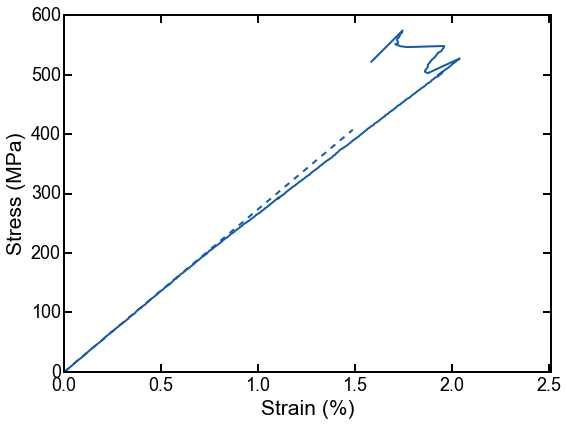

In [6]:
plt.line_plot((DIC_SS, linear_fit,
              xlim=(0, 2.51), ylim=(0, 600),
              xlabel='Strain (%)', ylabel='Stress (MPa)',
             linestyles = ('-', '--'),
              colors = plt.get_COLORS(('blue',))
             )

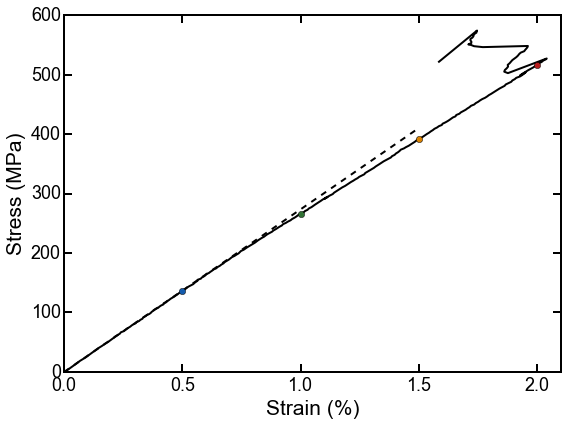

In [46]:
frames = [DIC.nearest(DIC_SS[:, 0], strain) for strain in [0.5, 1, 1.5, 2]]
data = [DIC_SS, linear_fit, ] + [np.vstack((np.array([-1, -1]), DIC_SS[frame])) for frame in frames]
plt.line_plot(data, 
              xlim=(0, 2.1), ylim=(0, 600),
              xlabel='Strain (%)', ylabel='Stress (MPa)',
             linestyles = ('-','--', '', '', '', ''),
              markers = ('', '', 'o', 'o', 'o', 'o'),
              colors = plt.get_COLORS(('black', 'black', 'blue', 'green', 'orange', 'red')), 
             )

C:\Anaconda3\lib\site-packages\matplotlib\collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


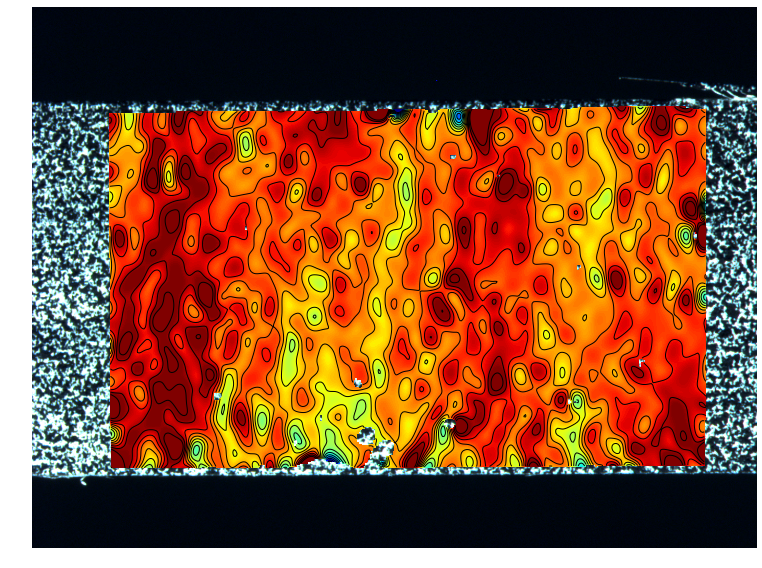

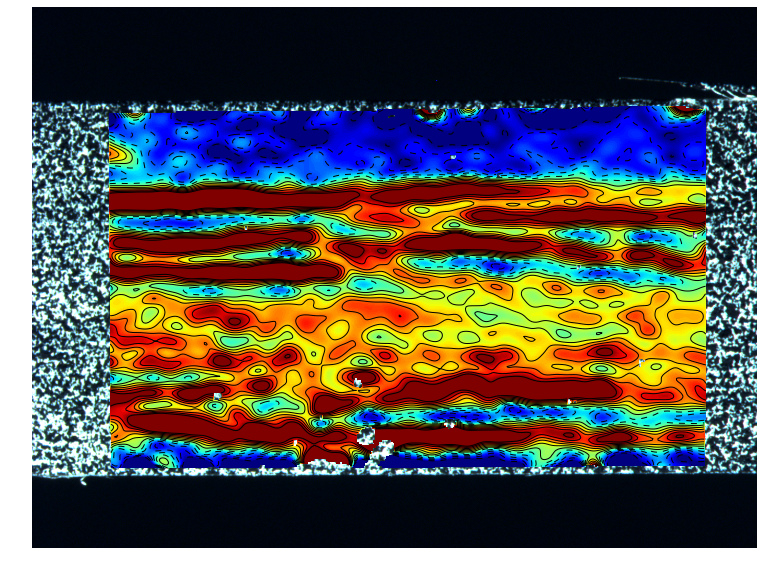

In [41]:
frame = frames[3]
DIC_data.contour_overlay(frame, 'exx',
                    zlim = (0, 0.025),
                    major_spacing = 0.002, figsize=8,
                       )

DIC_data.contour_overlay(frame, 'eyy',
                       zlim = (-0.01, 0.01),
                    major_spacing = 0.002, figsize=8,
                      )